In [1]:
from lbm.datasets.housing_prices import Preprocessor
import pandas as pd

processor = Preprocessor()
train_loader, val_loader, test_loader = processor.get_loaders()

feature_names = processor.get_feature_names()

df = pd.DataFrame(columns=feature_names)
for X, y in train_loader:
    # iterate over each row of X
    for x in X:
        # append the row to the dataframe
        df.loc[len(df)] = x.numpy()
display(df)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-118.139999,33.950001,42.0,1413.0,228.0,630.0,219.0,6.8564
1,-121.779999,38.009998,19.0,2688.0,469.0,1216.0,422.0,4.4491
2,-121.430000,38.570000,46.0,2443.0,476.0,939.0,457.0,3.5893
3,-122.779999,38.410000,43.0,1351.0,277.0,1011.0,297.0,2.5917
4,-119.139999,34.169998,16.0,1593.0,353.0,836.0,357.0,2.7260
...,...,...,...,...,...,...,...,...
16341,-121.410004,38.520000,25.0,3087.0,720.0,2529.0,708.0,1.8689
16342,-121.389999,38.549999,25.0,2171.0,431.0,1053.0,422.0,3.5278
16343,-116.860001,33.840000,18.0,521.0,118.0,174.0,74.0,2.7788
16344,-118.199997,34.130001,52.0,2035.0,459.0,2589.0,438.0,3.5349


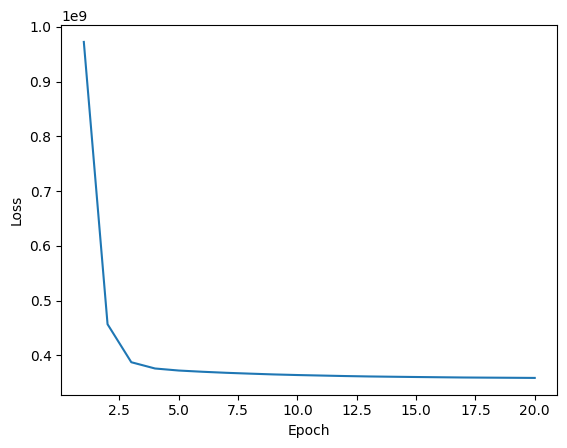

In [2]:
from lbm.models import MultiInLinear
from lbm.workflow import test, train
import matplotlib.pyplot as plt
import torch.optim as optim
import torch.nn as nn
import numpy as np

means, stds = processor.get_z_score()
model = MultiInLinear(len(feature_names), means, stds)

optimizer = optim.SGD(model.parameters())
loss_fn = nn.MSELoss()
losses = train(model, train_loader, optimizer, loss_fn, epochs=20)
plt.plot(np.arange(1, len(losses) + 1), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [3]:
without_ocean_proximity_test_loss = test(model, val_loader, loss_fn)
print(f'Without ocean proximity test loss: {without_ocean_proximity_test_loss}')

Without ocean proximity test loss: 359687791.52227116


In [4]:
processor = Preprocessor(include_ocean_proximity=True)
train_loader, val_loader, test_loader = processor.get_loaders()

feature_names = processor.get_feature_names()

df = pd.DataFrame(columns=feature_names)
for X, y in train_loader:
    # iterate over each row of X
    for x in X:
        # append the row to the dataframe
        df.loc[len(df)] = x.numpy()
display(df)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.480003,37.570000,34.0,4648.0,806.0,2282.0,814.0,4.5556,0.0,0.0,0.0,0.0,1.0
1,-118.230003,34.200001,51.0,1477.0,280.0,750.0,295.0,5.3925,1.0,0.0,0.0,0.0,0.0
2,-118.400002,33.930000,35.0,2217.0,447.0,1000.0,450.0,4.7319,1.0,0.0,0.0,0.0,0.0
3,-117.860001,33.849998,17.0,1131.0,236.0,622.0,244.0,4.9306,1.0,0.0,0.0,0.0,0.0
4,-121.430000,38.560001,41.0,1105.0,227.0,443.0,210.0,3.1827,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16341,-118.279999,33.880001,19.0,2758.0,675.0,2047.0,591.0,2.6618,1.0,0.0,0.0,0.0,0.0
16342,-118.459999,34.040001,17.0,2729.0,897.0,1404.0,758.0,3.1235,1.0,0.0,0.0,0.0,0.0
16343,-118.129997,34.070000,32.0,1880.0,428.0,1404.0,424.0,3.0850,1.0,0.0,0.0,0.0,0.0
16344,-121.940002,37.000000,32.0,2210.0,426.0,1082.0,396.0,4.1587,0.0,0.0,0.0,0.0,1.0


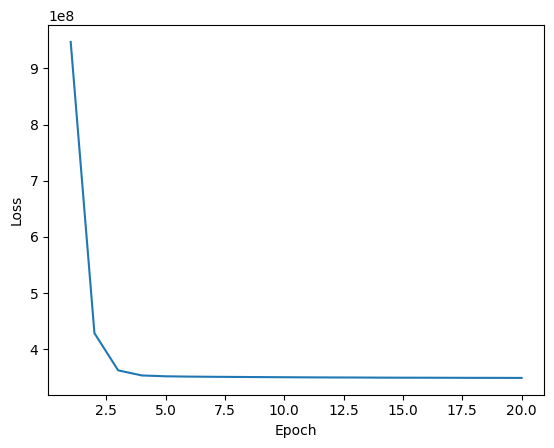

In [5]:
means, stds = processor.get_z_score()
model = MultiInLinear(len(feature_names), means, stds)

optimizer = optim.SGD(model.parameters())
loss_fn = nn.MSELoss()
losses = train(model, train_loader, optimizer, loss_fn, epochs=20)
plt.plot(np.arange(1, len(losses) + 1), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [6]:
with_ocean_proximity_test_loss = test(model, val_loader, loss_fn)
print(f'Without ocean proximity test loss: {without_ocean_proximity_test_loss}')
print(f'With ocean proximity test loss: {with_ocean_proximity_test_loss}')

Without ocean proximity test loss: 359687791.52227116
With ocean proximity test loss: 360787039.2325012


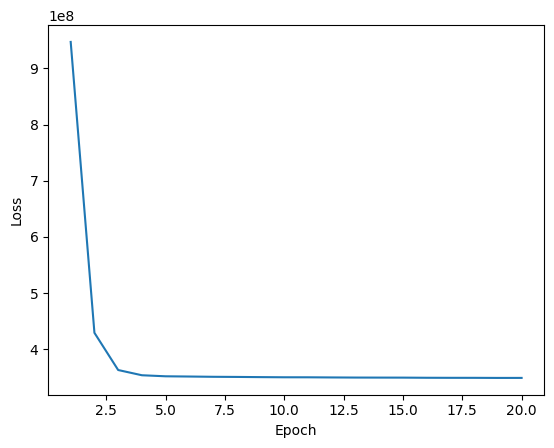

In [7]:
model = MultiInLinear(len(feature_names), means, stds)

optimizer = optim.SGD(model.parameters(), weight_decay=0.01)
loss_fn = nn.MSELoss()
losses = train(model, train_loader, optimizer, loss_fn, epochs=20)
plt.plot(np.arange(1, len(losses) + 1), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [8]:
with_regularization = test(model, val_loader, loss_fn)
print(f'Without ocean proximity test loss: {without_ocean_proximity_test_loss}')
print(f'With ocean proximity test loss: {with_ocean_proximity_test_loss}')
print(f'With ocean L2 regularization test loss: {with_regularization}')

Without ocean proximity test loss: 359687791.52227116
With ocean proximity test loss: 360787039.2325012
With ocean L2 regularization test loss: 361218729.66421926


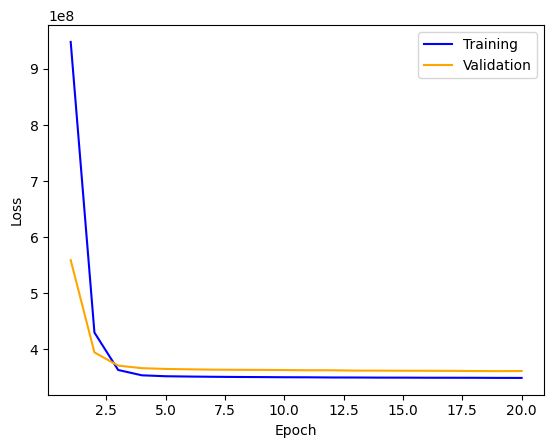

In [10]:
from lbm.workflow import train_and_validate

model = MultiInLinear(len(feature_names), means, stds)

optimizer = optim.SGD(model.parameters(), weight_decay=0.01)
loss_fn = nn.MSELoss()
train_losses, val_losses = train_and_validate(
    model,
    train_loader,
    val_loader,
    optimizer,
    loss_fn,
    epochs=20
)
plt.plot(np.arange(1, len(train_losses) + 1), train_losses, label='Training', color='blue')
plt.plot(np.arange(1, len(val_losses) + 1), val_losses, label='Validation', color='orange')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()